 ## Simulated Signal Data Generation
 The simulated signal for this example will be constructed by the combination of two Gaussian peaks with some
 overlap.  The height of each peak will be dependent on a concentration value.  The target value for each generated
 signal will be the concentration value.  The goal of the project will be correctly classify each sample based on
 the concentration value.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import norm    

mpl.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (12, 5)


 The following plot shows the separate Gaussian peaks used to generate the project test signal.  This sample signal
 was derived from an example in the
 [**Rampy**](https://github.com/charlesll/rampy/blob/master/examples/Baseline_and_Centroid_determination.ipynb) project.

Text(0.5, 0.98, 'Signal Base Gaussian Shapes')

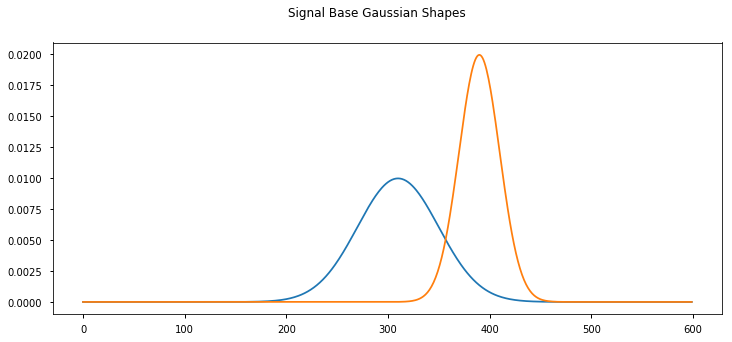

In [2]:
xnum = 600
np.random.seed(42)
x = np.arange(0, xnum, 1.0)
S_1 = norm.pdf(x, loc=310.0, scale=40.0)
S_2 = norm.pdf(x, loc=390.0, scale=20.0)
S_true = np.vstack((S_1, S_2))

fig, axs = plt.subplots()
axs.plot(x, S_1)
axs.plot(x, S_2)
fig.suptitle('Signal Base Gaussian Shapes')


 The following plots will show the combined Gaussian peaks at varying concentration levels.  The first
 plot is generated using a fixed set of concentrations values.  The second plot generates a random set of
 curves with the line color determined from the concentration level.

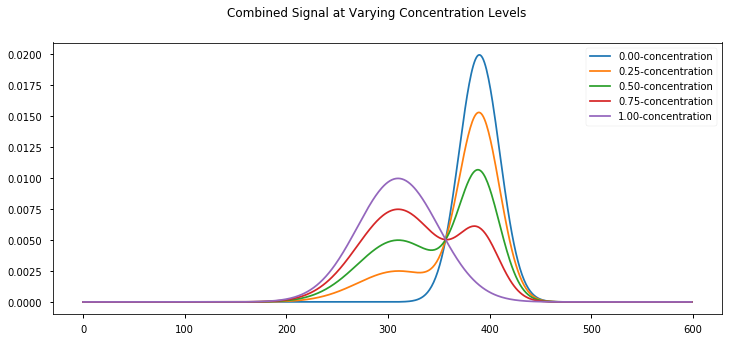

In [3]:
C_true = np.array([[0.0, 1.0], [0.25, 0.75], [0.5, 0.5], [0.75, 0.25], [1.0, 0.0]])
signal = np.dot(C_true, S_true)

fig, axs = plt.subplots()
for i, level in enumerate(C_true):
    axs.plot(x, signal[i], label='{0:.2f}-concentration'.format(C_true[i, 0]))
fig.suptitle('Combined Signal at Varying Concentration Levels')
plt.legend()


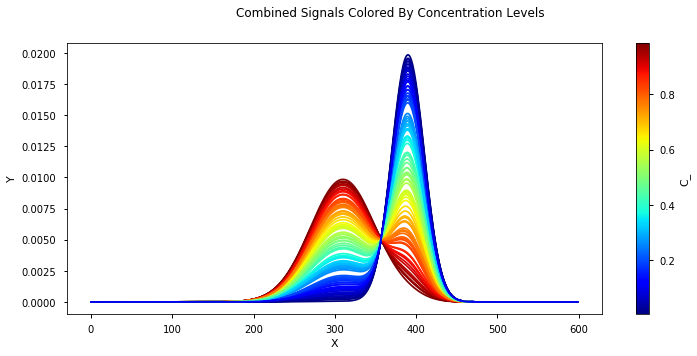

In [4]:
nsamples = 100
C_levels = np.random.rand(nsamples)
C_matrix = np.vstack((C_levels, (1-C_levels))).T
samples = np.dot(C_matrix, S_true)

# norm is a class which, when called, can normalize data into the
# [0.0, 1.0] interval.
norm = mpl.colors.Normalize(vmin=np.min(C_levels), vmax=np.max(C_levels))

# create a ScalarMappable and initialize a data structure
jet = plt.get_cmap('jet')
s_m = mpl.cm.ScalarMappable(norm=norm, cmap=jet)
s_m.set_array([])

# plotting spectra
# calling the ScalarMappable that was initialised with c_m and norm
fig, axs = plt.subplots()
for i in range(nsamples):
    color = s_m.to_rgba(C_levels[i])
    axs.plot(x, samples[i, :].T, color=color)

# we plot the colorbar, using again our
# ScalarMappable
c_bar = plt.colorbar(s_m)
c_bar.set_label(r"C_")

fig.suptitle('Combined Signals Colored By Concentration Levels')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
